[View in Colaboratory](https://colab.research.google.com/github/ViveK-PothinA/Misc-Notebooks-Scripts/blob/master/Blog1_DogBreedClassification(Keras).ipynb)

This notebook was primarily written for my [blog](https://medium.com/@vivekpothina/working-with-kaggle-dataset-on-google-colab-d3d4a77ead62). Check it out for more instructions!

In [0]:
!ls

datalab


# Get Data from Kaggle

Kaggle provides a command line tool to make downloading datasets easier. But for the Kaggle-CLI to work, a kaggle.json specific to the user needs to be in the system of usage. As you can see, we don't have direct system access in Google Colab. Follow these simple steps:

*   Go to https://www.kaggle.com/{Username}/account
*   Scroll down and download the kaggle.json by clicking 'Create New API Token'
*   Upload the kaggle.json file to your Google Drive
*   Then, run the below script
*   A new tab will open, select your google account
*   Copy the authentication code and paste it in the field of the below cell



In [0]:
# Install the Kaggle CLI
!pip install kaggle

# Import kaggle.json from google drive
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


Now, you can start using Kaggle CLI.

In [0]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    config              Configuration settings


Use Kaggle CLI to download the required dataset. The command to download dataset will be provided in the specific 'Data' Tab.

In [0]:
!kaggle competitions download -c dog-breed-identification -w -f train.zip
!kaggle competitions download -c dog-breed-identification -w -f labels.csv

 99%|████████████████████████████████████████▌| 341M/345M [00:01<00:00, 210MB/s]
100%|█████████████████████████████████████████| 345M/345M [00:01<00:00, 189MB/s]
  0%|                                                | 0.00/214k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 214k/214k [00:00<00:00, 42.9MB/s]


In [0]:
!ls

datalab  labels.csv.zip  train.zip


 Unzip the data

In [0]:
!unzip labels.csv.zip
!unzip train.zip

Archive:  labels.csv.zip
  inflating: labels.csv              
Archive:  train.zip
   creating: train/
  inflating: train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: train/0075dc49dab4024d12fafe67074d8a81.jpg  
  inflating: train/00792e34


  inflating: train/0df400016a7e7ab4abff824bf2743f02.jpg  
  inflating: train/0df4124761f7303a0080d50377f2ec7b.jpg  
  inflating: train/0dff1edc6643df0d8ea6e0c5ca63b133.jpg  
  inflating: train/0e0e44349e6955bea9fea91de26a6980.jpg  
  inflating: train/0e167bb5c5d4736190d220d081d1de23.jpg  
  inflating: train/0e1ac042292a573ecd0ec71b3b646997.jpg  
  inflating: train/0e1fcfa1796f8c54b9fa4b56a3a1fc4e.jpg  
  inflating: train/0e24a584e10db2c8f827ab00772e29cf.jpg  
  inflating: train/0e33a6b9235d5cbb8712daf0abbd0007.jpg  
  inflating: train/0e3cdff3560de43a8aa1d9820c211fae.jpg  
  inflating: train/0e403e86dc961d59fec94dfb62968a53.jpg  
  inflating: train/0e47c35f24067b19557e15fcfd48778c.jpg  
  inflating: train/0e532335572b91360975154c90381689.jpg  
  inflating: train/0e549376cfed70cf2a5b84e7a42d85ef.jpg  
  inflating: train/0e63b24bfd67158963830f64b5126aef.jpg  
  inflating: train/0e6e4b104e3cdf4c1963d74a27390f8e.jpg  
  inflating: train/0e6f7b1083d38cfef96ccdf3171608d3.jpg  
  inflating: 


  inflating: train/19477984aa7b1543928557a7dcce685c.jpg  
  inflating: train/196586cdb571b583d65533c64fee85f6.jpg  
  inflating: train/197c5a3fe9af1bb08d5a19be04d5419b.jpg  
  inflating: train/197ec7eddccac0c672141018bd63ae59.jpg  
  inflating: train/19824021ae3bb47d0ed1069c78633c6c.jpg  
  inflating: train/19836230f52797b4d2221ca670ee6db7.jpg  
  inflating: train/1986d8c21c77b80cd81c2b2e1fe24665.jpg  
  inflating: train/19913fd83b0011c107db05f1b739d1a5.jpg  
  inflating: train/1998465c04b1bd90da3f6070201a6ce6.jpg  
  inflating: train/19a845cb10c06885ee147501491a65c9.jpg  
  inflating: train/19a8c1698819d382c3ead14bdc1a360b.jpg  
  inflating: train/19ac75060dec82ee4c5a72b003e977f2.jpg  
  inflating: train/19b2acc95a6e88fc737241abd6d3b7f9.jpg  
  inflating: train/19c0f716ccb733fb5881e47e3644a1bf.jpg  
  inflating: train/19cd5d0eb4cd70e2a7b1b65cd097c7b9.jpg  
  inflating: train/19de1db12b3ddc7f2af6d9453c977083.jpg  
  inflating: train/19f97faa7cf9e8efe2d92c0162f7043a.jpg  
  inflating: 

  inflating: train/279c273d9b40a48846a53a90eca6b2da.jpg  
  inflating: train/27a2cef9b40af3b24e60e23de77f3d9d.jpg  
  inflating: train/27aef70dc8105fa9eae07bf969dc3e05.jpg  
  inflating: train/27c96fe6f4dae2f400dca8f40e619978.jpg  
  inflating: train/27d675d26f650549558bcb0d2bb250d4.jpg  
  inflating: train/27dc32da78ef081a347e24cb5bdfdcdf.jpg  
  inflating: train/27f50802bca226538a25140326c9ae92.jpg  
  inflating: train/27fdff7f05bfa707dccde0c6662c3f7e.jpg  
  inflating: train/28015b269195e53baca16836f39347b2.jpg  
  inflating: train/280d29e9e2f9cf53e8deba4dc1d352fb.jpg  
  inflating: train/2812c8abfb915dfe85aa5ae62e5f3ba3.jpg  
  inflating: train/2815f2b94d41c24a9bc192e2d95f5215.jpg  
  inflating: train/28192a31f9b51c06019dd62fcbf984c6.jpg  
  inflating: train/28294e8620e31bf4364d99b2cfda387f.jpg  
  inflating: train/282f23a4decf778f59a15447c4588902.jpg  
  inflating: train/28324516db1ad19c3b33c1b6ad397774.jpg  
  inflating: train/28353e057b0f67d44cb95baa708688d8.jpg  
  inflating: t

  inflating: train/34477dd85d981cbc58da5a6704e4c27f.jpg  
  inflating: train/34522d22eafcf06f3f740cdecef11f72.jpg  
  inflating: train/3452530c98c5575462f66181d5c8ae05.jpg  
  inflating: train/3455f0cb647857d2504b08ad459d44ee.jpg  
  inflating: train/345bfa49a83d1bc253151729b951b589.jpg  
  inflating: train/345d27e7013c21cafbeda5b20c1f80a3.jpg  
  inflating: train/346b6652f1bc74e39346e0e979b4b4d4.jpg  
  inflating: train/346c9842d580b40bd7ca52d4095e3ea4.jpg  
  inflating: train/347db53f4b0d597d88d25e6a96328cc9.jpg  
  inflating: train/34820b973423fc13032f76cc9430ad47.jpg  
  inflating: train/349c2556fbccdb0672d63ebd0c2beaed.jpg  
  inflating: train/34a2e0cf51238ef0227dd59e03b05987.jpg  
  inflating: train/34aad1fd93c4dd674fc8c77d6ba5e03a.jpg  
  inflating: train/34aae33ecbc1652660ca2640d5c7e566.jpg  
  inflating: train/34b1a312ff8f82f428e89250e3819be3.jpg  
  inflating: train/34ca4e5a95bf09f623da63f4d566eb19.jpg  
  inflating: train/34cad3808556bf37897242235e11fcc4.jpg  
  inflating: t


  inflating: train/3f99c5eac70d57d0231f5165621f2046.jpg  
  inflating: train/3f9b91e7965a3b1ce705f75cdd714028.jpg  
  inflating: train/3fa50a116915d4cfa704f04c0e8710c1.jpg  
  inflating: train/3faf5c4f754db7435f7e7950ff2c1b05.jpg  
  inflating: train/3fbcf669fce6ecb27c5e9b46e6fdf889.jpg  
  inflating: train/3fbefd398d24832aa2d84a81e36a645a.jpg  
  inflating: train/3fc2dde0964144cd07747c740469e60b.jpg  
  inflating: train/3fc59f50c6d8977f9d964be62b3eee4a.jpg  
  inflating: train/3fd302069a546b652bc1a38165d5ada2.jpg  
  inflating: train/3fd4d0daf3781126dde8e6d4e47ce4dd.jpg  
  inflating: train/3fd70a53b7c06f88831923d17f5ae2ea.jpg  
  inflating: train/3fe38b30abae7147cf67ce083389943e.jpg  
  inflating: train/3fe86d55e854c8bdc80e02c3a9c96843.jpg  
  inflating: train/3fe88fd71334eea9924c28d2423b844c.jpg  
  inflating: train/3fef6e63d8590ca814653301855ff000.jpg  
  inflating: train/3ff0641f3b2da6e8cc8b1dc39bdee8a0.jpg  
  inflating: train/3ff6733907952843baaa539d47f34e65.jpg  
  inflating: 

  inflating: train/4b1d4e5e91b58eb73861a3841fe1ed02.jpg  
  inflating: train/4b27534176a30cba0528d05c26b4c95f.jpg  
  inflating: train/4b2f8a39135f080e4830c0de981890da.jpg  
  inflating: train/4b30249d3baaf6a00a0345ac07f01d30.jpg  
  inflating: train/4b310ee3481bd8c44bac0cb7b1ee103a.jpg  
  inflating: train/4b3f4c910479686b10d676f813da0b3f.jpg  
  inflating: train/4b47fe23fa6972002789b8c68cdf7395.jpg  
  inflating: train/4b4b970f447e78e9e0094a482c24f90d.jpg  
  inflating: train/4b4edddba0a1dbc78d5f98ddacd8e3ab.jpg  
  inflating: train/4b532a761edf37dd9898b6bb7000476a.jpg  
  inflating: train/4b5b818436bd7a7a83fbb02b9880727c.jpg  
  inflating: train/4b5c813f99948df4f67b380f23f9d4de.jpg  
  inflating: train/4b5e166a87fb01064c330b50c8678995.jpg  
  inflating: train/4b5f9ef76af8a149b65e2ad2f875b7ab.jpg  
  inflating: train/4b659b822211c1d18baf2a3be382db0d.jpg  
  inflating: train/4b66e3a702acaf31f438fbc12a529892.jpg  
  inflating: train/4b691c6936f4292697c85683f6a35aad.jpg  
  inflating: t

  inflating: train/583abf9c03d62deece68b028cefd2193.jpg  
  inflating: train/583ecb9b0612f272a8be2e9960a09424.jpg  
  inflating: train/584a27a01ea4e54d777424d906385c1b.jpg  
  inflating: train/584cd71118e2b4da3193bf3b4269b159.jpg  
  inflating: train/585415deac2e42c00d225fdcbe3ef466.jpg  
  inflating: train/5857b6aade7068572506ff278b512ffa.jpg  
  inflating: train/58660bd76dc762e242dd91acd3883561.jpg  
  inflating: train/5866ab5e2c16f09bc64834cb51386ce5.jpg  
  inflating: train/586f6c70898d463676f8e6e1e2b96b1d.jpg  
  inflating: train/586fed74a07df1d04f3c477a408d3f7c.jpg  
  inflating: train/58702ebaf1c9018a168307cf3af5f06c.jpg  
  inflating: train/588ab2a7549948662d6adce12919050e.jpg  
  inflating: train/588c24329e981774b6b188a658629329.jpg  
  inflating: train/58907ef2bd01d75acf0a6a6ef9b60e58.jpg  
  inflating: train/5890a31936422f660462407b1176d1ee.jpg  
  inflating: train/58a604f4ec2a831e0b6281bafc404ec1.jpg  
  inflating: train/58a6a34a91059b13bfda501c64a7356c.jpg  
  inflating: t

  inflating: train/643b53a4ca7b26291c05a265a53153ee.jpg  
  inflating: train/6443a2914f8066fceb43bdaf97e1aba4.jpg  
  inflating: train/644b20efdc7375c268aa32c7b79d0b41.jpg  
  inflating: train/64595bed80b1d933f241ed3676f99d53.jpg  
  inflating: train/645b77026d28ed168ce9324c0de9ba78.jpg  
  inflating: train/645c27a9ac90d16476106d25db5c18ba.jpg  
  inflating: train/645dcbaa43083fbb561f9ed582d1c556.jpg  
  inflating: train/64644021b0fc03719953cb793ff920f5.jpg  
  inflating: train/646748df308394b13010087e6c158066.jpg  
  inflating: train/64684514366ddd73a109ad635f6f0148.jpg  
  inflating: train/64823d438ff897c9a8888571e5b0bb2f.jpg  
  inflating: train/6485a03e52b82371893d26e3119514f3.jpg  
  inflating: train/6487f0f5886fa4e46ef422d8069acb8d.jpg  
  inflating: train/648a8e6fb6ce37317220f1f5bdb46fdd.jpg  
  inflating: train/648d5aa62cd1d3d2f264133ccd78fed0.jpg  
  inflating: train/6496959bd5a27de3cb15e771ca2ae7b3.jpg  
  inflating: train/649bd8654c22611e7e4912d58249cb47.jpg  
  inflating: t

  inflating: train/7035172c071b6774e427e923078549cb.jpg  
  inflating: train/7037652031c91f0b1d77089a1a6f981c.jpg  
  inflating: train/7038b23a52b78ec5e244f024433e6b2f.jpg  
  inflating: train/7043f88b39377d1f4bdf5f4e4dc3f651.jpg  
  inflating: train/70462e9512d0b258c1a976a1d523f918.jpg  
  inflating: train/704e95ff2d221580f4c35a5f6d212ab5.jpg  
  inflating: train/704fbb5c83c3eff3dc98c5c740dfe327.jpg  
  inflating: train/7056cba8b901038c958b857d8431675b.jpg  
  inflating: train/705933f1ba0ac42f48d3f5c6c9b7ebd2.jpg  
  inflating: train/7062866964c8894fa9aa0c91ced60474.jpg  
  inflating: train/706502a6f7f079d0dd4fe5287a8c3d59.jpg  
  inflating: train/70685fef6eaf5cddd4de563cd6b5763c.jpg  
  inflating: train/706939cce23d7bbcf3c734866bebd582.jpg  
  inflating: train/70723f841076e19dfb1cfe98bcef84ff.jpg  
  inflating: train/7077311c6c566b639eca1386a9ec84e5.jpg  
  inflating: train/707acb2cbc6c351181a087fc94c4b05f.jpg  
  inflating: train/707d53744509d2ddae68e7359b7155aa.jpg  
  inflating: t

  inflating: train/7da8b8bc4de7303c3142d05059b6c4da.jpg  
  inflating: train/7db94bf9f2634ed4cb5b8f8212cbd0a7.jpg  
  inflating: train/7dc6c8e4af37515a897c914fe2f650d3.jpg  
  inflating: train/7dcbc220f0156e1dd31f0591e254410f.jpg  
  inflating: train/7de977fc7d4aa84d1bdb1511b2f824e6.jpg  
  inflating: train/7dea1389409efaf7aa32b03d01c6ab52.jpg  
  inflating: train/7ded64b171d3bab3db45d659027eddce.jpg  
  inflating: train/7df374a44e16734af61b3c1a156a0f63.jpg  
  inflating: train/7e09628892ea2cdb5abddd8b345caf4c.jpg  
  inflating: train/7e1b9c2578655329d460cc9bebe697e6.jpg  
  inflating: train/7e31a263b3fe36ad702aa0e47925df3b.jpg  
  inflating: train/7e34c1b065821d70b429c97afb606b7a.jpg  
  inflating: train/7e3d9d78e20a2bf4a22e8d844a6b67e9.jpg  
  inflating: train/7e51be6584255a09aad57cc33e83f68b.jpg  
  inflating: train/7e5300a4c551a23c3e27b4ca3b77fd62.jpg  
  inflating: train/7e588e10f731d4f76f896e017dcdce69.jpg  
  inflating: train/7e651e77387c1695c7480e7f6c78ae87.jpg  
  inflating: t


  inflating: train/8b9484507627b9aa40a2ed98d8023d45.jpg  
  inflating: train/8b9bb5dbe62e19115abfe6e13590c148.jpg  
  inflating: train/8baf3971eb1fd962a9752a24f4ce0a2b.jpg  
  inflating: train/8baf4fd87d634ccdcb7965b2b55c9639.jpg  
  inflating: train/8bba6c2e3b2994c4e313d2c489e29880.jpg  
  inflating: train/8bbb5cc1bb607fe461d5dd90052496b8.jpg  
  inflating: train/8bbdac6dc170956cbf2e73c55b611a12.jpg  
  inflating: train/8bd89fdacf4254cbb1739c541b654351.jpg  
  inflating: train/8bd905838263efd8c2cac790b5f17912.jpg  
  inflating: train/8bd9f03c437e44fc390e90d05b1af1bf.jpg  
  inflating: train/8bea04061f396a71de9ad8c45810ad0d.jpg  
  inflating: train/8bef88134879b7794217700319b25561.jpg  
  inflating: train/8befc822b56b744d72872428a0ef4851.jpg  
  inflating: train/8befd30dd8d44c30e9346b04a525b410.jpg  
  inflating: train/8bf58e563f62837df002040db7d84311.jpg  
  inflating: train/8bf5bd677a71e574a08dfd4fe7af1461.jpg  
  inflating: train/8c02f4026ef8f3595879db865c7b9f0d.jpg  
  inflating: 


  inflating: train/97c1a3631c969b4489ede8ec9c80b4fc.jpg  
  inflating: train/97c863ca10051ae4822b13264c40589e.jpg  
  inflating: train/97d24551ed20f55b7323e37e85adb4b6.jpg  
  inflating: train/97d712e7a54a5c89ebb6c41947128fb1.jpg  
  inflating: train/97e8c5fb46a894b5817e752259315886.jpg  
  inflating: train/97e940e416301389fb1c3eacd424ef35.jpg  
  inflating: train/97eaf551c872ffc382aacc77fd2766e9.jpg  
  inflating: train/97f66937029b254fcf94be88cdffaf56.jpg  
  inflating: train/9802d488e7a0b8b4fb04bfe2af2361f9.jpg  
  inflating: train/9806378e6363a0c93fa66c152fa094b2.jpg  
  inflating: train/980657a2afaf0fdd549e166fa899407e.jpg  
  inflating: train/980ecf1bdb0d8d48093f6a83a9b349a0.jpg  
  inflating: train/9813633e973fbc891a9bc031f8ec6d08.jpg  
  inflating: train/9825dfdb2952299a99a2d049a0451636.jpg  
  inflating: train/98398963f090dae624c421e6b6a0ebe5.jpg  
  inflating: train/9839d076759d03fb33db62f180efeaa6.jpg  
  inflating: train/983d4d40106bbaee0404d242221acb6e.jpg  
  inflating: 


  inflating: train/a5bf14a3b9f161ce9c458e82d823bea3.jpg  
  inflating: train/a5c070dca3f40179283251f1a1184bf2.jpg  
  inflating: train/a5c2986a3e2416a6ed58b842fe0e5d68.jpg  
  inflating: train/a5c6ca31780472bc6297dcb230ba8d0d.jpg  
  inflating: train/a5d812a813274bd656337ad3a76947e2.jpg  
  inflating: train/a5da71c4259e319c5f66bc170f751350.jpg  
  inflating: train/a5daf7e90363737374840aee6cbf6ab5.jpg  
  inflating: train/a5e12305354299b560665bffbd811f8d.jpg  
  inflating: train/a5e57f1238951796094e0bf72409e90b.jpg  
  inflating: train/a5e8b55e8a408c9e63bd2986b56b9911.jpg  
  inflating: train/a5f391ecec6ead7ff92785232f7c1d1d.jpg  
  inflating: train/a60cee9ebe302922195274c34d55e989.jpg  
  inflating: train/a614fc9031217ffdb1707fa4f8a48dc7.jpg  
  inflating: train/a61c439d669536fe7c93e8df65e06798.jpg  
  inflating: train/a6230f82a77ecf899cdcc1ba62073084.jpg  
  inflating: train/a6247763d4791f9bf3cb080311fe8f3f.jpg  
  inflating: train/a628532fb55e1d2bdf8a3958df74de35.jpg  
  inflating: 


  inflating: train/b38ca23d57777786a6e641b7bfb18329.jpg  
  inflating: train/b38d84aa581bb69d437ce2b128198012.jpg  
  inflating: train/b39551fc6a24b76d219c3244b587a2e2.jpg  
  inflating: train/b39b851ef02720a4fc4ac85dc1ade7b9.jpg  
  inflating: train/b39c3d11e16d3432246aceac3e4ab3fe.jpg  
  inflating: train/b39fd55dd45e4f1066b80960c8f39a84.jpg  
  inflating: train/b3b149700702da3865004745ef4f6001.jpg  
  inflating: train/b3b5eb135bc850b54a04d2c43b83a237.jpg  
  inflating: train/b3bcaf1fea645fbad288f546fd18cc64.jpg  
  inflating: train/b3beb6bab59975305146110d51fc7120.jpg  
  inflating: train/b3bf158af5af1610595320d4c78441c9.jpg  
  inflating: train/b3c04085f4a5d7f8dd5165efea027eb8.jpg  
  inflating: train/b3c360cdc204d571b5287268fa4b4c25.jpg  
  inflating: train/b3ca18e3ea2d722f3ab9b62cbde4bad5.jpg  
  inflating: train/b3cbe3c848a691f2b94838723ffbfb4b.jpg  
  inflating: train/b3ce58830523907af62e0069e081bc71.jpg  
  inflating: train/b3ce89788191e0f62e14820abd176628.jpg  
  inflating: 

  inflating: train/c0a4e82e33d14987683715ef833e8401.jpg  
  inflating: train/c0abba0e417be48e778809d94dad57a7.jpg  
  inflating: train/c0b53533209ff39a4620a5959a1c5c98.jpg  
  inflating: train/c0c3cd7054d43a350f772b8242cd0217.jpg  
  inflating: train/c0c60bf6e9807b71e15c63309ed58e36.jpg  
  inflating: train/c0ca40ffa35be4d2772870794fa298cf.jpg  
  inflating: train/c0d10ee669b1ccc5bc60950efd19cd53.jpg  
  inflating: train/c0d13d17657300bfe361ad0f8511fe38.jpg  
  inflating: train/c0d456fd289a6f0f9a2e40192a37251f.jpg  
  inflating: train/c0de582157dbd2320e406cdfea59ef11.jpg  
  inflating: train/c0df63bcc4d3e7d829307a331bcd6abc.jpg  
  inflating: train/c0e21b16483abecd9449bce9122cb82d.jpg  
  inflating: train/c0e6e8660b28cd6f91bee7e75f63cde1.jpg  
  inflating: train/c0ec60ef57bce7f784d8a6f1615d169d.jpg  
  inflating: train/c0eed44536c5f094235cb78635fa01ae.jpg  
  inflating: train/c0f1af3542270b1e4f1be3403d17ec35.jpg  
  inflating: train/c0f28a8976414ad02d4d4c256a45711b.jpg  
  inflating: t


  inflating: train/cf0973fa8d11be069b23769e781daf9d.jpg  
  inflating: train/cf0b75d1f10ab79d91069820c99dc4fa.jpg  
  inflating: train/cf16389be0d418812e47ae7694b441b4.jpg  
  inflating: train/cf1b216674bc2d431405ef57d01e6a3e.jpg  
  inflating: train/cf269794a592d3b6ab3a52d59830d763.jpg  
  inflating: train/cf27299362ada8a5e99e4368c9f8de35.jpg  
  inflating: train/cf2851761c1af3015e67d12681c40f11.jpg  
  inflating: train/cf2ab1c0c1009cceb951ca7d74bf13ca.jpg  
  inflating: train/cf2eae68033af7a625dcb3a2565482f2.jpg  
  inflating: train/cf3697f8f3ee67b50cedaa63904ab5e8.jpg  
  inflating: train/cf3b0064d1834e9184645d870021f148.jpg  
  inflating: train/cf44ff5245f6b6c1ea2ad82930bfb237.jpg  
  inflating: train/cf67eaba9efa7e9af92f8b0356ba02d1.jpg  
  inflating: train/cf6e0ec97666cf8ddc3de90f1273ff4d.jpg  
  inflating: train/cf82709a00a4f2168555b8f77c0d815d.jpg  
  inflating: train/cf835d1c4bc696f14bc631156c9a770f.jpg  
  inflating: train/cf853fd31d054b54395a43469d1f49a8.jpg  
  inflating: 

  inflating: train/dd2026cafded2318431c3c78f5026fc9.jpg  
  inflating: train/dd273d04d5bd6da804f278fc767c6ca8.jpg  
  inflating: train/dd27b4e1da87a6db84d1aa08f908c95d.jpg  
  inflating: train/dd28cda8dfc9a97642d3333722a520af.jpg  
  inflating: train/dd3509cbfcfc094e5e4726b648a26048.jpg  
  inflating: train/dd4449d7083cbce6c5dbc4d66091652d.jpg  
  inflating: train/dd48373a8d9f30daf5f7b51a3beb1325.jpg  
  inflating: train/dd52583a6a9bfdcc5278c5d61a57b7e1.jpg  
  inflating: train/dd5a3c84fb3c388ecf0b4da61eaef352.jpg  
  inflating: train/dd6482115d974cab92c9428c9a6fe29f.jpg  
  inflating: train/dd664bf798e6b767704a9da2e0d26cbe.jpg  
  inflating: train/dd68215c1ac5b073fc42202f229bc283.jpg  
  inflating: train/dd694fe7f5b46a6dd7c545d31004e1f6.jpg  
  inflating: train/dd79ba1404da7aa15471494d11657b68.jpg  
  inflating: train/dd7bd28f48de7a9dd72dcc4fbfe50741.jpg  
  inflating: train/dd826e6990638acaff24142f0d4b0b4b.jpg  
  inflating: train/dd82e748363c70f532e630c5197dd789.jpg  
  inflating: t


  inflating: train/e9aaa8964f450f990a7a3c4228bb844d.jpg  
  inflating: train/e9ac785eb7c5e7c31dd54be18e40bff2.jpg  
  inflating: train/e9b8e25755fcc201168fdf2d299e5350.jpg  
  inflating: train/e9c694db39c5b8c904bf36c385fb171b.jpg  
  inflating: train/e9d31fe3a42451dc01c6d2e15ba6ef8d.jpg  
  inflating: train/e9d78bc07d863ba45ccee1a6c872182d.jpg  
  inflating: train/e9d910ff8abc407c1536201210b40888.jpg  
  inflating: train/e9da345a17d3e21041214e6cef9556a4.jpg  
  inflating: train/e9efc5edbe14eb6375a64b37db8b36df.jpg  
  inflating: train/e9f19fbf059a074a0b40c5b088f4fa6f.jpg  
  inflating: train/e9f77a21c65963a5e82079536a05c811.jpg  
  inflating: train/e9fc49ac28d4f84579f5621bccc78470.jpg  
  inflating: train/e9fc775bd40d6d7273ff093fa12a0574.jpg  
  inflating: train/ea06fc45fe1d39398d6ad82c2f741742.jpg  
  inflating: train/ea0d557dd0acd9191f45e703d18be9b3.jpg  
  inflating: train/ea113a236df0ae1d6875259ed2d2bcde.jpg  
  inflating: train/ea12edc949e2572580fa237d3daea938.jpg  
  inflating: 


  inflating: train/f7fdd6d141e45d148eaf6ba595a9c45b.jpg  
  inflating: train/f8009b210e1fca906bbfd55a17fcb224.jpg  
  inflating: train/f80541bbc3592999ccc617bdcbd9fde9.jpg  
  inflating: train/f8068ff990794cc54cd2d647387ecf6d.jpg  
  inflating: train/f80ad50586c794ea8555e3bed23e0c0e.jpg  
  inflating: train/f80f575bb32f2cc1958ef092681b9ea4.jpg  
  inflating: train/f811a137cac1489f074529064f79acfe.jpg  
  inflating: train/f811a192eb721accaa495e6722d9acff.jpg  
  inflating: train/f8169d735ce64c6b8e4c421d61b2d3b5.jpg  
  inflating: train/f817cad476ff2a52fbe5b56a422dd577.jpg  
  inflating: train/f819a72296da2b1dc4f21d8145c40f27.jpg  
  inflating: train/f81ec41ce2cc1acb16597fdd231c2406.jpg  
  inflating: train/f821311972e25d3dc8e8cf76a64e53e1.jpg  
  inflating: train/f824e27367e8475401b62b24111c467f.jpg  
  inflating: train/f8271e8e638b9bab6a0d3e164874dd53.jpg  
  inflating: train/f827aadcd7537def18615dc19f650456.jpg  
  inflating: train/f82a2b46267b6d4edc62c76ebdb0fc8b.jpg  
  inflating: 

In [0]:
!ls

datalab  labels.csv  labels.csv.zip  train  train.zip


# Let's explore the Data

In [101]:
# Importing modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline

In [102]:
# Let's check the labels
labels_df = pd.read_csv("labels.csv")
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [103]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in labels_df['breed']:
  if(label in labels_map):
    continue
  
  labels_map[label] = count
  inv_labels_map[count] = label
  
  count = count + 1

print("Label Map: ", labels_map)
print("No. of Labels are: ", count)

Label Map:  {'boston_bull': 0, 'dingo': 1, 'pekinese': 2, 'bluetick': 3, 'golden_retriever': 4, 'bedlington_terrier': 5, 'borzoi': 6, 'basenji': 7, 'scottish_deerhound': 8, 'shetland_sheepdog': 9, 'walker_hound': 10, 'maltese_dog': 11, 'norfolk_terrier': 12, 'african_hunting_dog': 13, 'wire-haired_fox_terrier': 14, 'redbone': 15, 'lakeland_terrier': 16, 'boxer': 17, 'doberman': 18, 'otterhound': 19, 'standard_schnauzer': 20, 'irish_water_spaniel': 21, 'black-and-tan_coonhound': 22, 'cairn': 23, 'affenpinscher': 24, 'labrador_retriever': 25, 'ibizan_hound': 26, 'english_setter': 27, 'weimaraner': 28, 'giant_schnauzer': 29, 'groenendael': 30, 'dhole': 31, 'toy_poodle': 32, 'border_terrier': 33, 'tibetan_terrier': 34, 'norwegian_elkhound': 35, 'shih-tzu': 36, 'irish_terrier': 37, 'kuvasz': 38, 'german_shepherd': 39, 'greater_swiss_mountain_dog': 40, 'basset': 41, 'australian_terrier': 42, 'schipperke': 43, 'rhodesian_ridgeback': 44, 'irish_setter': 45, 'appenzeller': 46, 'bloodhound': 47,

{'boston_bull': 86, 'dingo': 79, 'pekinese': 74, 'bluetick': 84, 'golden_retriever': 66, 'bedlington_terrier': 88, 'borzoi': 74, 'basenji': 109, 'scottish_deerhound': 125, 'shetland_sheepdog': 75, 'walker_hound': 68, 'maltese_dog': 116, 'norfolk_terrier': 82, 'african_hunting_dog': 85, 'wire-haired_fox_terrier': 81, 'redbone': 71, 'lakeland_terrier': 98, 'boxer': 74, 'doberman': 73, 'otterhound': 68, 'standard_schnauzer': 71, 'irish_water_spaniel': 77, 'black-and-tan_coonhound': 76, 'cairn': 105, 'affenpinscher': 79, 'labrador_retriever': 83, 'ibizan_hound': 90, 'english_setter': 82, 'weimaraner': 84, 'giant_schnauzer': 68, 'groenendael': 81, 'dhole': 75, 'toy_poodle': 79, 'border_terrier': 90, 'tibetan_terrier': 106, 'norwegian_elkhound': 94, 'shih-tzu': 111, 'irish_terrier': 81, 'kuvasz': 70, 'german_shepherd': 68, 'greater_swiss_mountain_dog': 81, 'basset': 81, 'australian_terrier': 101, 'schipperke': 85, 'rhodesian_ridgeback': 87, 'irish_setter': 87, 'appenzeller': 77, 'bloodhound'

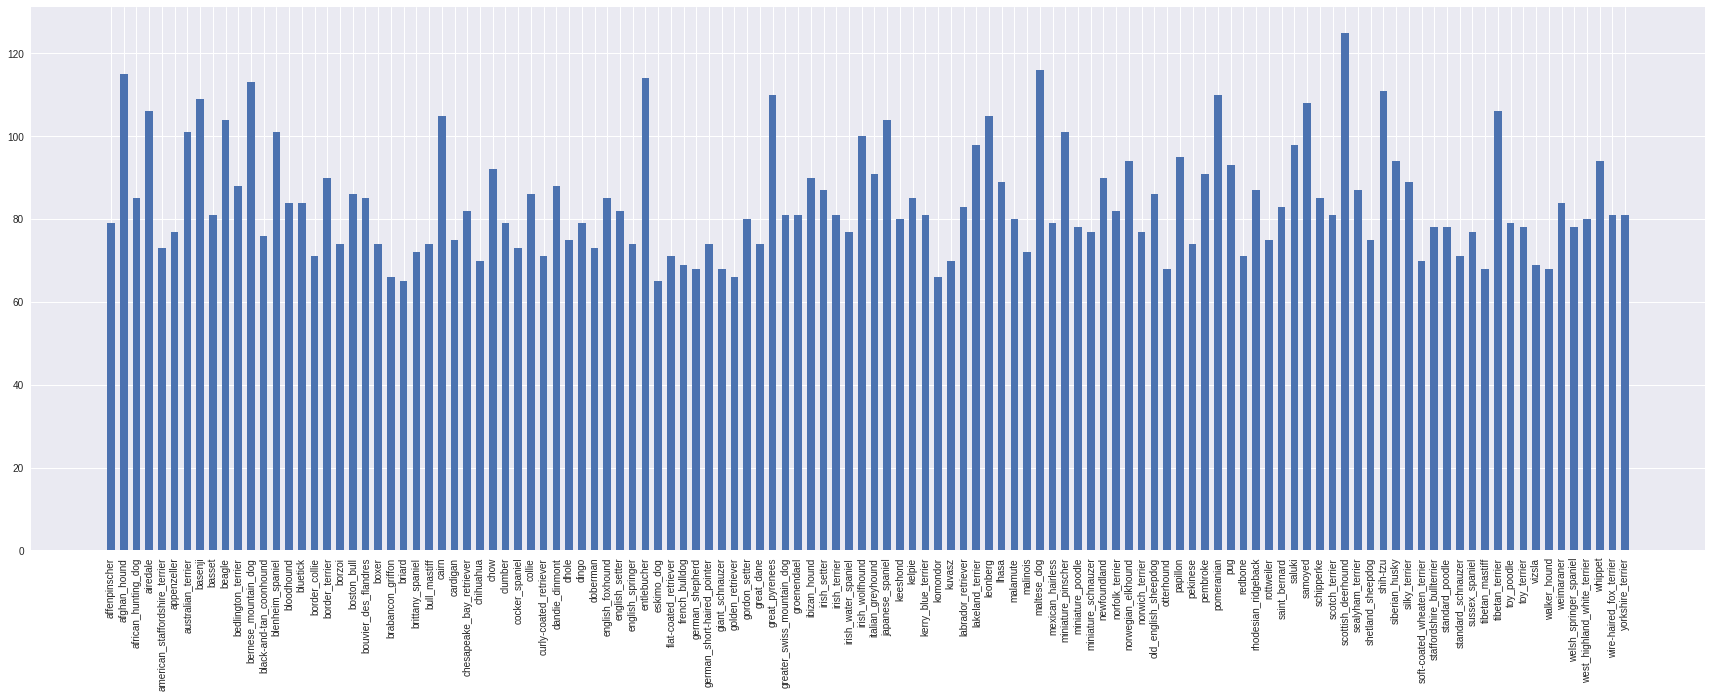

In [104]:
# Let's check the distribution of the classes we have

labels_count = {}
for label in labels_df['breed']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
print(labels_count)
plt.figure(figsize=(30,10))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

Label: english_foxhound
Shape of the image is: (640, 480, 3)
Max: 255 , Min: 0


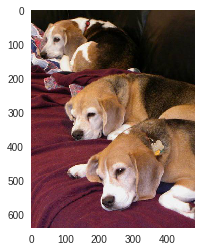

In [0]:
# Now, let's check the images we have in training data
example_img = random.choice(os.listdir("train"))
print("Label:", labels_df.loc[labels_df['id'] == example_img[:-4]]['breed'].all())
example_img = plt.imread("train/"+example_img)
plt.grid(False)
plt.imshow(example_img)
print("Shape of the image is:", example_img.shape)

print("Max:", example_img.max(), ", Min:", example_img.min())

# Running this cell for few, we can understand that the shapes of the images keep varying, we solve this problem by resizing the images

# Create Training, Validation and Test Sets

In [0]:
x_train = []
y_train = []

In [0]:
for ids, label in labels_df.values:
  img_path = "train/"+ids+".jpg"
  img = cv2.imread(img_path)
  target = np.zeros(120)
  x_train.append(np.array(cv2.resize(img,(224,224))))
  target[labels_map[label]] = 1
  y_train.append(target)

In [0]:
# Converting lists into numpy arrays
# Our training set is divided by 255 to normalize the image data

y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.
print(len(x_train), len(y_train), x_train.shape, y_train.shape)
length = len(x_train)


In [0]:
# Splitting the data into Training, Validation and Test set

test_split = int(length*0.8)
print("Training set + Validation set: ", test_split)
x_train, x_test, y_train, y_test = x_train[:test_split], x_train[test_split:], y_train[:test_split], y_train[test_split:]

valid_split = int(length*0.6)
print("Training set: ", valid_split)
x_train, x_valid, y_train, y_valid = x_train[:valid_split], x_train[valid_split:], y_train[:valid_split], y_train[valid_split:]

print("Validation set: ", str(test_split - valid_split))
print("Test set: ", str(length - test_split))

Training set + Validation set:  8177
Training set:  6133
Validation set:  2044
Test set:  2045


In [0]:
image_shape = x_train.shape
length = len(x_train)
print(length, image_shape)

6133 (6133, 224, 224, 3)


In [0]:
# A simple cross-check
2045+2044+6133

10222

# Let's Begin our Model

In [0]:
# Importing
import tensorflow as tf
from tensorflow.python.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras import Model, Sequential, optimizers

# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Dropout, Flatten, Dense, Activation
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization

In [0]:
# To cross-check whether the instance is on GPU or not 
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# The architecture of the CNN Model

model = Sequential()
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

model.add(Dense(num_classes, activation='softmax'))

In [0]:
# Summary of CNN architecture

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 54, 54, 32)        128       
__________

In [0]:
# Setting up some hyperparameters

batch_size = 128
epochs = 20
learning_rate = 0.001
num_classes = 120

In [0]:
# Training the model

opt = optimizers.Adam(lr = learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
m = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                  batch_size=batch_size,verbose=2, epochs=epochs, shuffle = True)

Train on 6133 samples, validate on 2044 samples
Epoch 1/20
 - 24s - loss: 4.6225 - acc: 0.0364 - val_loss: 4.6926 - val_acc: 0.0372
Epoch 2/20
 - 22s - loss: 4.2677 - acc: 0.0713 - val_loss: 4.4616 - val_acc: 0.0455
Epoch 3/20
 - 22s - loss: 4.0706 - acc: 0.1097 - val_loss: 4.3364 - val_acc: 0.0582
Epoch 4/20
 - 22s - loss: 3.8931 - acc: 0.1326 - val_loss: 4.2592 - val_acc: 0.0621
Epoch 5/20
 - 23s - loss: 3.7397 - acc: 0.1573 - val_loss: 4.1638 - val_acc: 0.0910
Epoch 6/20
 - 23s - loss: 3.5782 - acc: 0.1826 - val_loss: 4.1338 - val_acc: 0.0890
Epoch 7/20
 - 22s - loss: 3.4233 - acc: 0.2120 - val_loss: 4.0511 - val_acc: 0.0925
Epoch 8/20
 - 22s - loss: 3.2526 - acc: 0.2488 - val_loss: 4.0034 - val_acc: 0.1052
Epoch 9/20
 - 23s - loss: 3.0761 - acc: 0.2915 - val_loss: 3.9965 - val_acc: 0.1111
Epoch 10/20
 - 23s - loss: 2.9008 - acc: 0.3356 - val_loss: 3.8920 - val_acc: 0.1248
Epoch 11/20
 - 22s - loss: 2.7125 - acc: 0.3872 - val_loss: 3.9422 - val_acc: 0.1189
Epoch 12/20
 - 22s - loss:

Notice the huge difference between training accuracy and validation accuracy. The model is overfitting

In [91]:
# Running the model on test set

scores = model.evaluate(x_test, y_test, verbose = 1)
print(scores[1])

2045/2045 [==============================] - 4s 2ms/step
0.14180929100090833


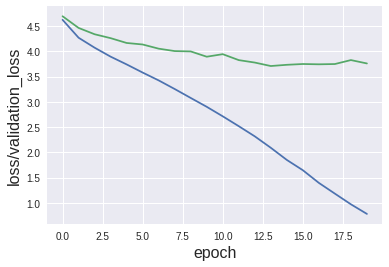

In [97]:
# Graph of loss per epoch

plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.xlabel("epoch", fontsize = "16")
plt.ylabel("loss/validation_loss", fontsize = "16")
plt.show()

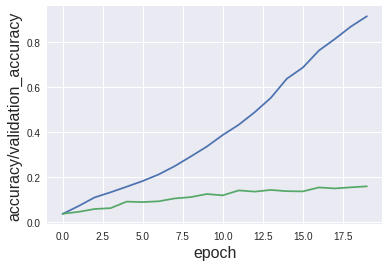

In [99]:
# Graph of accuracy per epoch

plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.xlabel("epoch", fontsize = "16")
plt.ylabel("accuracy/validation_accuracy", fontsize = "16")
plt.show()

**Clearly, the model is overfitting, but on  a dataset like this, this model performance is good one. To perform better on this dataset, we can use data augmentation or transfer learning!**